210803 - Korea Univ. Machine Learning Mini Project

In [118]:
# 데이터 전처리 패키지
import numpy as np
import pandas as pd
import os

# 기계학습 모델 구축 및 평가 패키지
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import StandardScaler,MinMaxScaler, MaxAbsScaler,RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from collections import Counter

# 경고 숨기기
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, GridSearchCV, validation_curve
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import ensemble
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt

# MAPE def.
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [2]:
os.getcwd()

'C:\\Users\\이길용'

In [3]:
# 데이터 불러오기
data = pd.read_csv("C:/Users/이길용/pt_train_dt.csv")

## Data 탐색 및 전처리

In [4]:
data.head(3)

,lot_id,wf,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_395,x_396,x_397,x_398,x_399,x_400,y_1,y_2,y_3,split
0,TDRM795W,9,1.473766,85.908215,249.959409,47.834938,856.046648,2500.0,0.495354,0.565273,...,64.0,64.0,64.0,64.0,64.0,64.0,56.55,58.9400,57.5425,train
1,TDRM129W,3,0.023678,99.979704,249.959409,0.270607,1001.481572,2500.0,0.000000,0.000000,...,55.0,55.0,55.0,55.0,55.0,55.0,57.68,59.7750,58.2325,train
2,TDRLY92W,11,0.007380,88.220968,249.959409,0.000000,882.352941,2500.0,0.366233,0.470358,...,75.0,75.0,75.0,75.0,75.0,75.0,54.67,58.4675,56.1875,train


In [5]:
d_columns = data.columns[1:402]

In [6]:
for col in d_columns:
    data[col] = data[col].fillna(data[col].median())

In [113]:
X.shape

(110125, 401)

In [7]:
X = data.drop(['lot_id','split','y_1','y_2','y_3'], axis=1)
Y = data[['y_1','y_2','y_3']]

In [8]:
# 학습 : 검증 : 테스트 = 6 : 3 : 1 데이터 분리
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.4, random_state=2021)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_valid, Y_valid, test_size=0.25, random_state=2021)

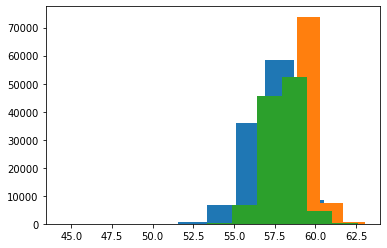

In [9]:
plt.hist(data.y_1)
plt.hist(data.y_2)
plt.hist(data.y_3)
plt.show()

In [ ]:
data.corr()

In [ ]:
# Outlier 처리 예정




# Scaling

### Standard Scaler

In [11]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_st = std_scaler.transform(X_train)
X_valid_st = std_scaler.transform(X_valid)
X_test_st = std_scaler.transform(X_test)

In [12]:
pd.DataFrame(X_train_st).describe()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
count,6.607500e+04,6.607500e+04,6.607500e+04,6.607500e+04,6.607500e+04,6.607500e+04,6.607500e+04,6.607500e+04,6.607500e+04,6.607500e+04,...,6.607500e+04,6.607500e+04,6.607500e+04,6.607500e+04,6.607500e+04,6.607500e+04,6.607500e+04,6.607500e+04,6.607500e+04,6.607500e+04
mean,-1.068590e-15,-3.022697e-16,-2.439918e-15,-3.444875e-16,-2.546313e-16,1.611486e-15,-1.136129e-15,-2.922218e-16,4.479303e-16,1.133259e-15,...,1.321480e-16,3.918335e-18,-1.341173e-16,-2.051951e-16,-3.357872e-16,-2.102325e-16,-1.167704e-16,1.484800e-16,2.793881e-16,-5.423769e-16
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.671783e+00,-6.000543e-01,-7.880025e+00,-2.941265e-01,-5.852157e-01,-8.479204e+00,-3.420785e-01,-3.151743e-01,-3.123729e-01,-4.392416e-01,...,-1.691463e+00,-1.936853e+00,-1.820160e+00,-1.861037e+00,-1.862353e+00,-1.863935e+00,-1.864723e+00,-1.868960e+00,-1.886539e+00,-1.902283e+00
25%,-8.374142e-01,-5.066493e-01,-5.375437e-01,-7.272882e-02,-4.729486e-01,-6.429184e-01,-7.206410e-02,-3.151743e-01,-3.123729e-01,-1.401243e-01,...,-8.780876e-01,-8.264625e-01,-8.547846e-01,-8.445347e-01,-8.473110e-01,-8.244621e-01,-8.035707e-01,-8.085341e-01,-8.274057e-01,-7.955655e-01
50%,-3.045357e-03,-4.993161e-01,-3.625876e-02,-7.272882e-02,-4.706955e-01,-1.182550e-01,-7.206410e-02,-3.151743e-01,-3.123729e-01,-8.611430e-02,...,-1.686639e-02,-5.739027e-03,7.633158e-03,2.675253e-02,2.272484e-02,1.867698e-02,1.641028e-02,1.088609e-02,-8.984728e-03,3.195624e-03
75%,8.313235e-01,-3.186042e-01,5.248310e-01,-7.272882e-02,-4.390197e-01,4.879067e-01,-7.206410e-02,2.532711e-01,1.970029e-01,-7.114976e-03,...,8.443549e-01,8.632623e-01,8.409502e-01,8.012301e-01,7.960900e-01,7.914362e-01,8.363913e-01,8.303063e-01,8.575787e-01,8.500749e-01
max,1.665692e+00,1.367931e+01,4.041555e+01,1.354379e+01,5.928207e+00,3.654699e+01,1.353885e+01,1.952168e+01,1.090176e+01,1.357668e+01,...,3.045254e+00,2.842654e+00,2.976434e+00,2.931043e+00,2.922844e+00,2.915003e+00,2.910461e+00,2.902957e+00,2.879560e+00,2.861413e+00


### Robust Scaler

In [13]:
Robust_scaler = RobustScaler()
Robust_scaler.fit(X_train)
X_train_RB = Robust_scaler.transform(X_train)
X_valid_RB = Robust_scaler.transform(X_valid)
X_test_RB = Robust_scaler.transform(X_test)

In [14]:
pd.DataFrame(X_train_RB).describe()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
count,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,...,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000
mean,0.001825,2.655299,0.034130,2.932547,13.873002,0.104574,23.837187,0.554450,0.613246,0.647430,...,0.009792,0.003396,-0.004501,-0.016255,-0.013828,-0.011558,-0.010006,-0.006643,0.005332,-0.001942
std,0.599260,5.317912,0.941295,40.321962,29.473635,0.884317,330.780070,1.759197,1.963202,7.518325,...,0.580575,0.591817,0.589719,0.607625,0.608499,0.618856,0.609775,0.610192,0.593482,0.607671
min,-1.000000,-0.535713,-7.383239,-8.927122,-3.375302,-7.393671,-89.314708,0.000000,0.000000,-2.654906,...,-0.972222,-1.142857,-1.077877,-1.147059,-1.147059,-1.165056,-1.147059,-1.147059,-1.114286,-1.157895
25%,-0.500000,-0.038997,-0.471853,0.000000,-0.066407,-0.463965,0.000000,0.000000,0.000000,-0.406062,...,-0.500000,-0.485714,-0.508581,-0.529412,-0.529412,-0.521777,-0.500000,-0.500000,-0.485714,-0.485380
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.961003,0.528147,0.000000,0.933593,0.536035,0.000000,1.000000,1.000000,0.593938,...,0.500000,0.514286,0.491419,0.470588,0.470588,0.478223,0.500000,0.500000,0.514286,0.514620
max,1.000000,75.400141,38.076788,549.040591,188.597505,32.423445,4502.185185,34.896680,22.015448,102.720512,...,1.777778,1.685714,1.750746,1.764706,1.764706,1.792394,1.764706,1.764706,1.714286,1.736842


### MaxAbs Scaler

In [15]:
MA_scaler = MaxAbsScaler()
MA_scaler.fit(X_train)
X_train_MA = MA_scaler.transform(X_train)
X_valid_MA = MA_scaler.transform(X_valid)
X_test_MA = MA_scaler.transform(X_test)

In [16]:
pd.DataFrame(X_train_MA).describe()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
count,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,...,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000
mean,0.520876,0.035825,0.174749,0.316511,0.074057,0.201224,0.360436,0.015888,0.027855,0.503300,...,0.363525,0.411189,0.385675,0.394473,0.395299,0.396131,0.396598,0.397742,0.401866,0.405336
std,0.287645,0.070485,0.020419,0.050466,0.156194,0.021856,0.047240,0.050412,0.089174,0.036585,...,0.209007,0.207136,0.206398,0.206592,0.206890,0.207161,0.207323,0.207465,0.207719,0.207823
min,0.040000,-0.006469,0.013846,0.301667,-0.017350,0.015901,0.344276,0.000000,0.000000,0.487231,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.280000,0.000114,0.163773,0.312840,0.000186,0.187172,0.357031,0.000000,0.000000,0.498174,...,0.180000,0.240000,0.209250,0.220000,0.220000,0.225336,0.230000,0.230000,0.230000,0.240000
50%,0.520000,0.000631,0.174009,0.312840,0.000537,0.198639,0.357031,0.000000,0.000000,0.500150,...,0.360000,0.410000,0.387250,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.406000
75%,0.760000,0.013368,0.185466,0.312840,0.005485,0.211888,0.357031,0.028656,0.045423,0.503040,...,0.540000,0.590000,0.559244,0.560000,0.560000,0.560084,0.570000,0.570000,0.580000,0.582000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modeling

### Linear Regression

In [17]:
# 선형 회귀 모델 학습 - Standard Scaler
model_LR_RB = LinearRegression().fit(X_train_RB, Y_train)
model_LR_RB.score(X_train_RB, Y_train)
model_LR_RB.coef_
model_LR_RB.intercept_
model_LR_RB.predict(X_test_RB)

array([[57.45597653, 59.56814336, 58.29494865],
       [56.82299855, 59.00061666, 57.72318379],
       [57.27668289, 59.18179192, 57.99304907],
       ...,
       [57.8976223 , 59.51703747, 58.54619716],
       [57.63885619, 59.59251333, 58.36443733],
       [57.01899165, 58.92756055, 57.7119848 ]])

In [18]:
model_LR_MA = LinearRegression().fit(X_train_MA, Y_train)
model_LR_MA.score(X_train_MA, Y_train)
model_LR_MA.coef_
model_LR_MA.intercept_
model_LR_MA.predict(X_test_MA)

array([[57.47237843, 59.59339079, 58.29901666],
       [56.88047195, 59.09291902, 57.74155603],
       [57.33409531, 59.27371315, 58.01071633],
       ...,
       [57.88827146, 59.50317129, 58.54538897],
       [57.63123391, 59.58506902, 58.3657228 ],
       [56.99871989, 58.89648875, 57.70804443]])

In [19]:
model_LR_RB.score(X_train_RB, Y_train)

0.18151634446900064

In [20]:
model_LR_MA.score(X_train_MA, Y_train)

0.17828767960474498

In [21]:
train_y_pred_RB = model_LR_RB.predict(X_train_RB)

In [22]:
train_y_pred_MA = model_LR_MA.predict(X_train_MA)

In [23]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [24]:
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_RB)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_RB))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_RB)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_RB)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_RB)))

Training MSE : 0.847
Training RMSE : 0.920
Training MAE : 0.684
Training MAPE : 1.184
Training R2 : 0.176


In [25]:
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_MA)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_MA))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_MA)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_MA)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_MA)))

Training MSE : 0.851
Training RMSE : 0.922
Training MAE : 0.686
Training MAPE : 1.187
Training R2 : 0.172


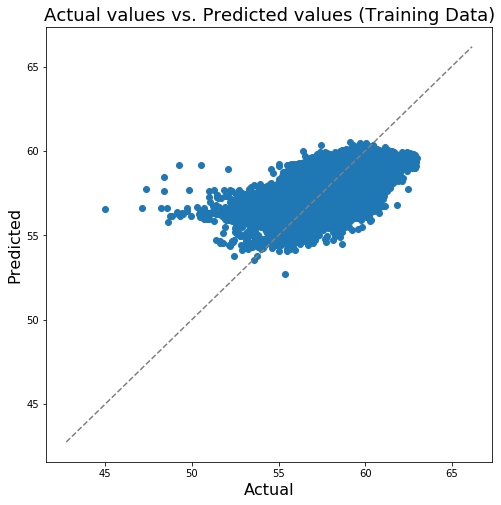

In [26]:
fig_values = np.concatenate([Y_train.squeeze(), train_y_pred_RB.squeeze()])
vmin = np.min(fig_values) * 0.95
vmax = np.max(fig_values) * 1.05

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Training Data)', size=18)
plt.scatter(Y_train, train_y_pred_RB)
plt.plot([vmin, vmax], [vmin, vmax], color='grey', linestyle='dashed')
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.show()

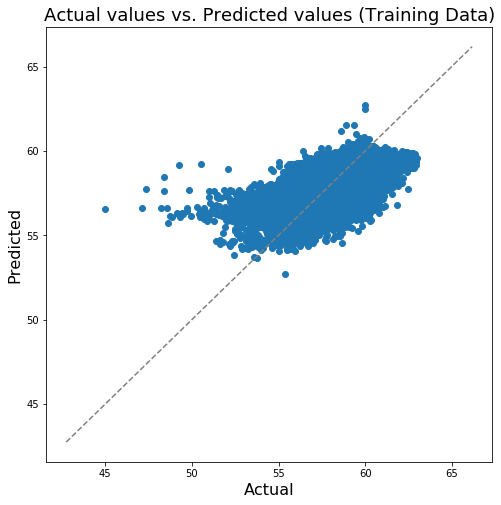

In [27]:
fig_values = np.concatenate([Y_train.squeeze(), train_y_pred_MA.squeeze()])
vmin = np.min(fig_values) * 0.95
vmax = np.max(fig_values) * 1.05

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Training Data)', size=18)
plt.scatter(Y_train, train_y_pred_MA)
plt.plot([vmin, vmax], [vmin, vmax], color='grey', linestyle='dashed')
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.show()

### Ridge / Lasso / ElasticNet Regression ( with CV )

In [28]:
ridge = Ridge()
alphas = np.logspace(-4, 0, 20)
parameters = {'alpha': alphas }
ridge_reg = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(X_train_RB,Y_train)
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 0.0006951927961775605}
-0.983755037734346


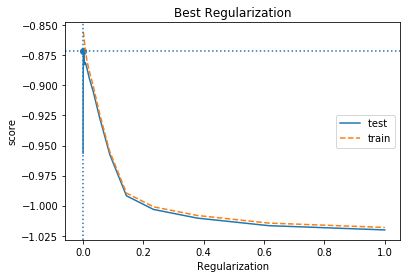

In [29]:
train_scores = []
test_scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    train_score = -mean_squared_error(Y_test, model.fit(X_train_RB, Y_train).predict(X_test_RB))
    test_score = np.mean(cross_val_score(model, X_train_RB, Y_train, scoring="neg_mean_squared_error", cv=5))
    train_scores.append(train_score)
    test_scores.append(test_score)
optimal_alpha = alphas[np.argmax(test_scores)]
optimal_score = np.max(test_scores)

plt.plot(alphas, test_scores, "-", label="test ")
plt.plot(alphas, train_scores, "--", label="train")
plt.axhline(optimal_score, linestyle=':')
plt.axvline(optimal_alpha, linestyle=':')
plt.scatter(optimal_alpha, optimal_score)
plt.title("Best Regularization")
plt.ylabel('score')
plt.xlabel('Regularization')
plt.legend()
plt.show()

In [30]:
lasso = Lasso()
parameters = {'alpha': alphas }
lasso_reg = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X_train_RB,Y_train)
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

KeyboardInterrupt: 

In [31]:
elasticnet = ElasticNet()
parameters = {'alpha': alphas }

elasticnet_reg = GridSearchCV(elasticnet, parameters, scoring='neg_mean_squared_error',cv=5)
elasticnet_reg.fit(X_train_RB, Y_train)
print(elasticnet_reg.best_params_)
print(elasticnet_reg.best_score_)

KeyboardInterrupt: 

### Decision tree

In [32]:
max_depths = list(range(1, 20)) + [None]
print(max_depths)

rmse_valid = []
mae_valid = []

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, None]


In [33]:
for max_depth in max_depths:
                     
    # 모델 학습
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train_RB, Y_train)
    
    # validation 예측
    y_valid_pred = model.predict(X_valid_RB)
    
    # 모델 평가 결과 저장
    rmse = np.sqrt(mean_squared_error(Y_valid, y_valid_pred))
    mae = mean_absolute_error(Y_valid, y_valid_pred)
    
    rmse_valid.append(rmse)
    mae_valid.append(mae)

In [34]:
xticks = list(map(str, max_depths))
print(xticks)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', 'None']


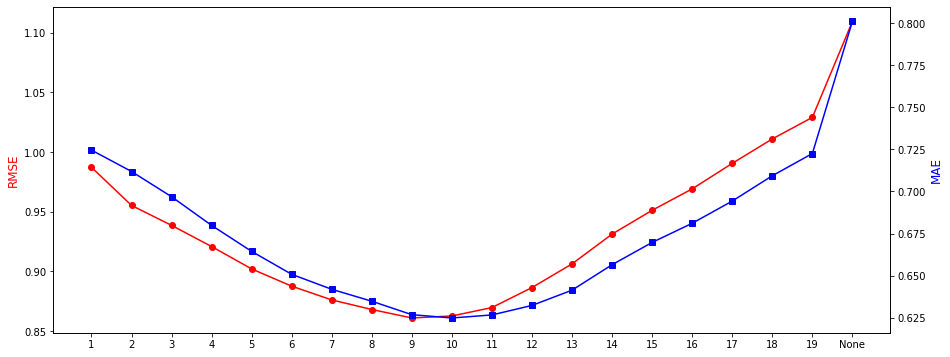

In [35]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(range(len(max_depths)), rmse_valid, color='red', marker='o')
ax.set_ylabel('RMSE', color='red', fontsize=12)

ax2 = ax.twinx()
ax2.plot(range(len(max_depths)), mae_valid, color='blue', marker='s')
ax2.set_ylabel('MAE', color='blue', fontsize=12)

plt.xticks(range(len(max_depths)), xticks)
plt.show()

In [36]:
model_r = DecisionTreeRegressor(max_depth=9)
model_r.fit(X_train_RB, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [37]:
# validation 예측
y_test_pred = model_r.predict(X_test_RB)
y_valid_pred = model_r.predict(X_valid_RB)

# RMSE , MAE
rmse_t = np.sqrt(mean_squared_error(Y_test, y_test_pred))
mae_t = mean_absolute_error(Y_test, y_test_pred)

rmse_tv = np.sqrt(mean_squared_error(Y_valid, y_valid_pred))
mae_tv = mean_absolute_error(Y_valid, y_valid_pred)

print('- RMSE (Test) : {:.1f}'.format(rmse_t))
print('- MAE  (Test) : {:.1f}'.format(mae_t))

print('- RMSE (Test) : {:.1f}'.format(rmse_tv))
print('- MAE  (Test) : {:.1f}'.format(mae_tv))

- RMSE (Test) : 0.9
- MAE  (Test) : 0.6
- RMSE (Test) : 0.9
- MAE  (Test) : 0.6


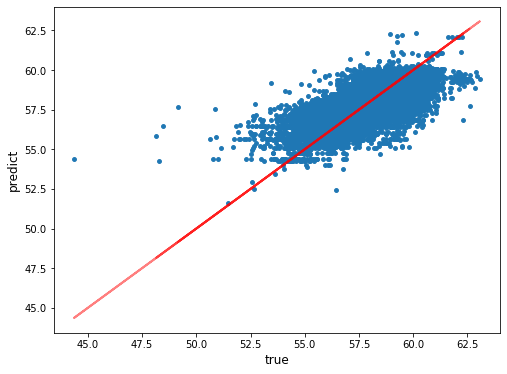

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_test_pred, s=15)
plt.plot(Y_test, Y_test, alpha=0.5, lw=2, color='red')
plt.xlabel('true', fontsize=12)
plt.ylabel('predict', fontsize=12)
plt.show()

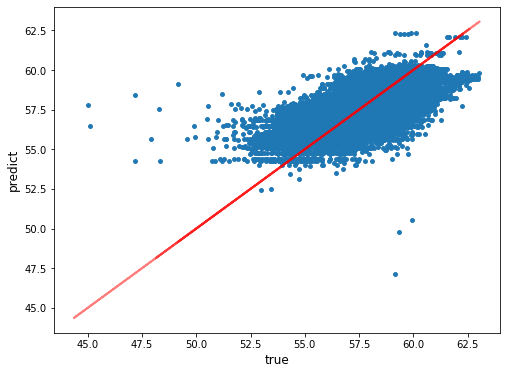

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_valid, y_valid_pred, s=15)
plt.plot(Y_test, Y_test, alpha=0.5, lw=2, color='red')
plt.xlabel('true', fontsize=12)
plt.ylabel('predict', fontsize=12)
plt.show()

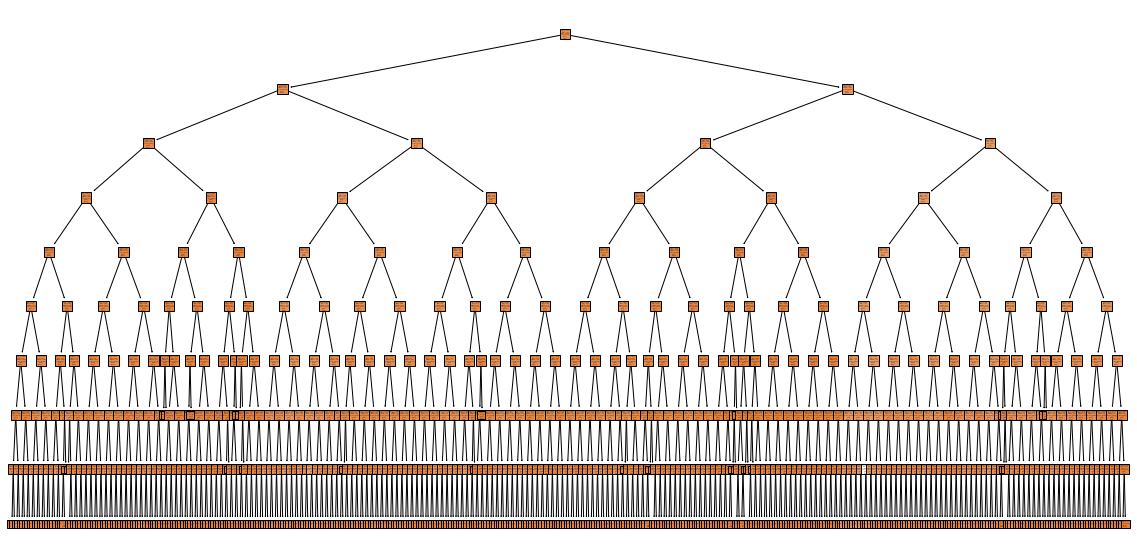

In [40]:
plt.figure(figsize=(20, 10))
plot_tree(decision_tree=model_r, filled=True)
plt.show()

In [41]:
# 변수 중요도
importances = model.feature_importances_

# 내림차순으로 정렬하기 위한 index
index = np.argsort(importances)[::-1]

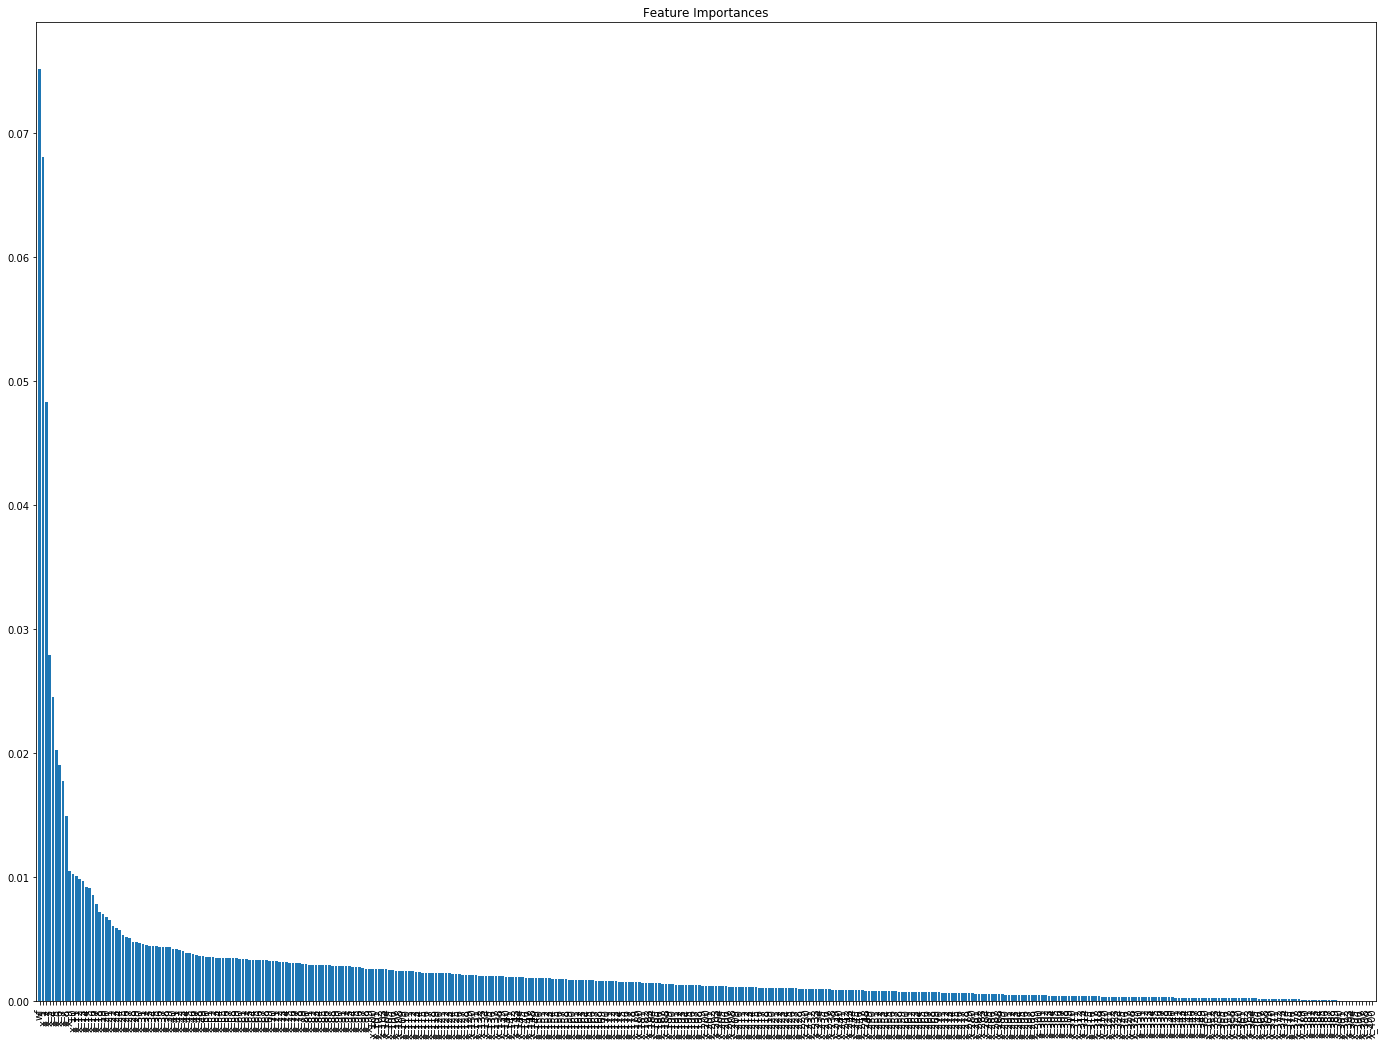

In [42]:
plt.figure(figsize=(24, 18))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[index],align='center')
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

* Random forest trees

In [49]:
var_name = np.array(data.columns[1:])

In [43]:
mseOos = []
nTreeList = range(50, 500, 10)


for iTrees in nTreeList:
    depth = None
    maxFeat = 4 #조정해볼 것
    wineRFModel = ensemble.RandomForestRegressor(n_estimators=iTrees,
                    max_depth=depth, max_features=maxFeat,
                    oob_score=False, random_state=531)
    wineRFModel.fit(X_train_RB, Y_train)
    #데이터 세트에 대한 MSE 누적
    prediction = wineRFModel.predict(X_valid_RB)
    mseOos.append(mean_squared_error(Y_valid, prediction))
print("MSE")
print(mseOos)

MSE
[0.7404110717911866, 0.7369194980206473, 0.7330586902730216, 0.7317613006306151, 0.7312426119481343, 0.7289036991488173, 0.727869992755231, 0.7270863367698457, 0.7261526313658896, 0.7253045273327446, 0.7256724174289827, 0.7259442611741159, 0.7260546272356261, 0.7255599678944856, 0.7252468618939298, 0.7245673032699442, 0.7243910293682547, 0.7241936194074056, 0.7238480854919908, 0.7239359051566469, 0.723121124296869, 0.7231010433233968, 0.7229817322733961, 0.7226765227369065, 0.7222611379658931, 0.7227528413287222, 0.7233494917774789, 0.7235379814108432, 0.7232259146746193, 0.723323495324245, 0.7229966847778, 0.7228234890250858, 0.7231088409998279, 0.722940901780864, 0.7232752951072215, 0.7236309742173487, 0.7233927838135377, 0.7234169930864912, 0.7233295948052175, 0.723286000033033, 0.7232913969949858, 0.7235551060347277, 0.723401615784033, 0.7233590495757105, 0.7234478963868755]


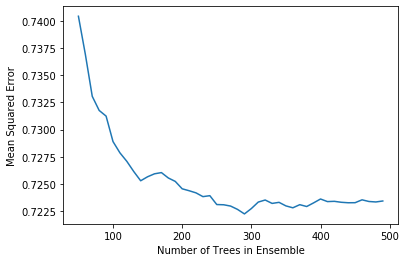

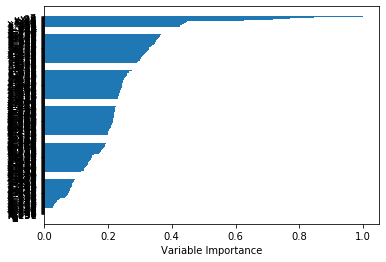

In [50]:
plt.plot(nTreeList, mseOos)
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Mean Squared Error')
#plot.ylim([0.0, 1.1*max(mseOob)])
plt.show()

#피처 중요도 도표 그리기
featureImportance = wineRFModel.feature_importances_

#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plt.barh(barPos, featureImportance[sorted_idx], align='center')
plt.yticks(barPos, var_name[sorted_idx])
plt.xlabel('Variable Importance')
plt.show()

0.8333856350546692


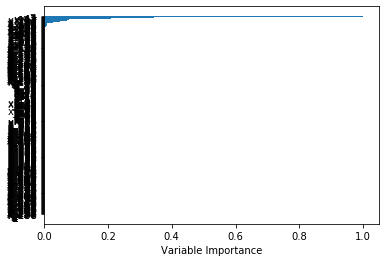

In [53]:
regr = RandomForestRegressor(max_depth=4, random_state=531,
                          n_estimators=150)
regr.fit(X_train_RB, Y_train)
prediction = regr.predict(X_valid_RB)
print(mean_squared_error(Y_valid, prediction))
featureImportance = regr.feature_importances_

#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plt.barh(barPos, featureImportance[sorted_idx], align='center')
plt.yticks(barPos, var_name[sorted_idx])
plt.xlabel('Variable Importance')
plt.show()

* Gradient boosting Regression

In [54]:
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [61]:
X_train_RB.shape

(66075, 401)

In [62]:
Y_train.shape

(66075, 3)

In [64]:
gbr_1 = GradientBoostingRegressor(**gbr_params)

gbr_1.fit(X_train_RB, Y_train['y_1'])

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [65]:
gbr_2 = GradientBoostingRegressor(**gbr_params)

gbr_2.fit(X_train_RB, Y_train['y_2'])

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [68]:
gbr_3 = GradientBoostingRegressor(**gbr_params)

gbr_3.fit(X_train_RB, Y_train['y_3'])

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [76]:
print("Model Accuracy y1: %.3f" % gbr_1.score(X_test_RB, Y_test['y_1']))

Model Accuracy y1: 0.343


In [77]:
print("Model Accuracy y2: %.3f" % gbr_2.score(X_test_RB, Y_test['y_2']))

Model Accuracy y2: 0.337


In [78]:
print("Model Accuracy y3: %.3f" % gbr_3.score(X_test_RB, Y_test['y_3']))

Model Accuracy y3: 0.321


In [79]:
mse = mean_squared_error(Y_test['y_1'], gbr_1.predict(X_test_RB))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.9808


In [80]:
mse = mean_squared_error(Y_test['y_2'], gbr_2.predict(X_test_RB))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.4608


In [81]:
mse = mean_squared_error(Y_test['y_3'], gbr_3.predict(X_test_RB))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.6142


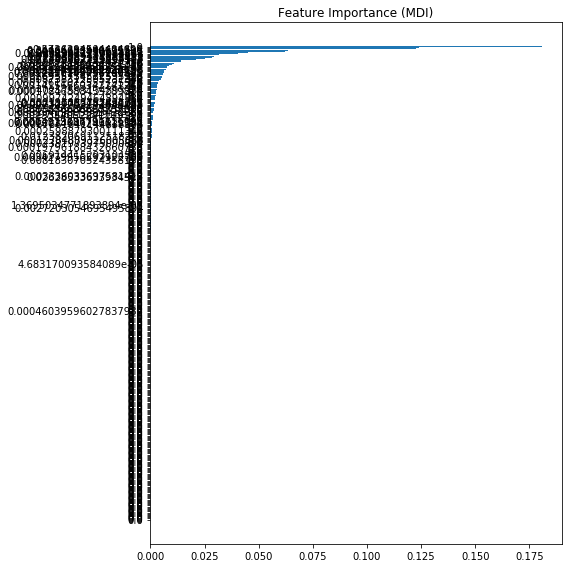

In [89]:
feature_importance = gbr_1.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, featureImportance[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(gbr_1, X_test_st, Y_test['y_1'], n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

In [85]:
test_score_1 = np.zeros((gbr_params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gbr_1.staged_predict(X_test_st)):
    test_score_1[i] = gbr_1.loss_(Y_test['y_1'], y_pred)

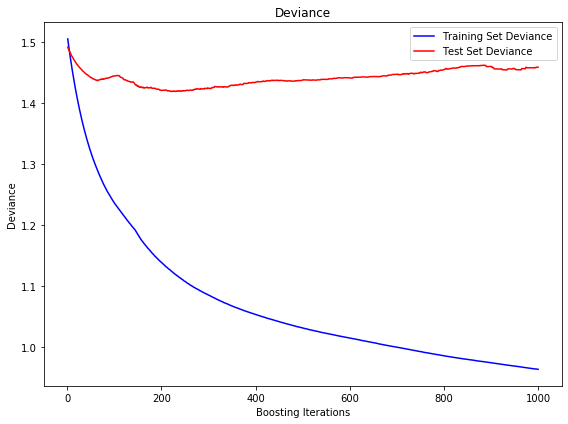

In [87]:
fig = plt.figure(figsize=(8,6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, gbr_1.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, test_score_1, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

* MLP Regressor

In [120]:
model_mlp = [
    LinearRegression(), 
    MLPRegressor(hidden_layer_sizes=[512, 4], alpha=0.005, random_state=42),
    MLPRegressor(hidden_layer_sizes=[48, 4], max_iter=5000, alpha=0.005, random_state=42), 
    MLPRegressor(hidden_layer_sizes=[512, 4], max_iter=5000, alpha=0.005, random_state=42), 
    MLPRegressor(hidden_layer_sizes=[1024, 4], max_iter=5000, alpha=0.005, random_state=42),
    MLPRegressor(hidden_layer_sizes=[1024, 512, 4], max_iter=5000, alpha=0.005, random_state=42),
]

for m in model_mlp:
    m.fit(X_train_RB, Y_train)
    print(m.__class__)
    print(r2_score(Y_train, m.predict(X_train_RB)))
    print(r2_score(Y_test, m.predict(X_test_RB)))

<class 'sklearn.linear_model._base.LinearRegression'>
0.17600166563761777
0.14134765492500692
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
-8.36794465700669
-8.932951495725419
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
-1.0384859972653921
-1.5350501130455625
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
-8.36794465700669
-8.932951495725419
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
0.6732344249708079
-0.17567068389512794
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
0.021767600288173334
-2.281403781636383


ValueError: x and y must be the same size

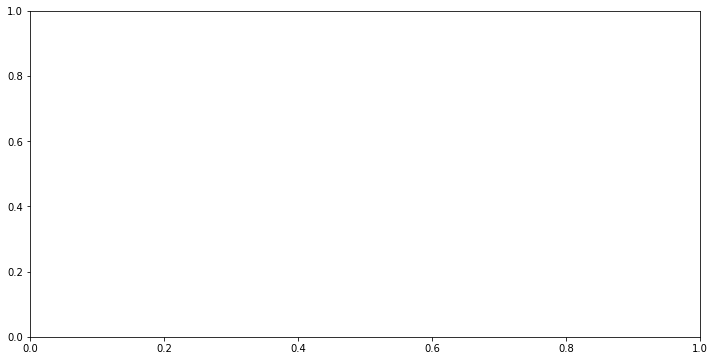

In [121]:
plt.figure(figsize=(12, 6))

plt.scatter(X_train_RB, Y_train, marker='^', s=50, alpha=0.7, label='y_true')
for i, m in enumerate(models):
    plt.scatter(X_train_RB, m.predict(X_train_RB), marker='o', s=10, alpha=0.7, label='nn_{}'.format(i))
plt.legend()
plt.show()

In [ ]:
train_history.history.keys()

val_loss_lst = train_history.history['val_loss']
train_loss_lst = train_history.history['loss']

plt.figure(figsize=(12, 4))
plt.plot(range(0, len(val_loss_lst)), val_loss_lst, label='val_loss')
plt.plot(range(0, len(train_loss_lst)), train_loss_lst, label='train_loss')
plt.legend()
plt.show()

## 테스트 데이터셋 성능 평가

In [ ]:
# 학습 데이터 예측 값
MSE_value = mean_squared_error(Y_test, y_test_pred)
RMSE_value = np.sqrt(mean_squared_error(Y_test, y_test_pred))
MAE_value = mean_absolute_error(Y_test, y_test_pred)
MAPE_value = mean_absolute_percentage_error(Y_test, y_test_pred)
r2_value = r2_score(Y_test, y_test_pred)

print("Testing MSE : {:.3f}".format(MSE_value))
print("Testing RMSE : {:.3f}".format(RMSE_value))
print("Testing MAE : {:.3f}".format(MAE_value))
print("Testing MAPE : {:.3f}".format(MAPE_value))
print("Testing R2 : {:.3f}".format(r2_value))

## 변수 선별

In [ ]:
# 제거할 변수 이름
drop_var = 

# 설정한 변수 제거
train_data_new = train_data.drop(drop_var, axis=1)
test_data_new = test_data.drop(drop_var, axis=1)

- 테스트 데이터 성능 평가

In [ ]:
# 변수가 제거된 데이터로 학습
lm_new = sm.OLS(train_data_new['MEDV'], train_data_new.drop('MEDV', axis=1))
lm_new_trained = lm_new.fit()
display(lm_new_trained.summary())

In [ ]:
# 학습 데이터 실제 값
test_true = test_data_new['MEDV']

# 학습 데이터 예측 값
test_pred = lm_new_trained.predict(test_data_new.drop(['MEDV'], axis=1))

new_MSE_value = mean_squared_error(test_true, test_pred)
new_RMSE_value = np.sqrt(mean_squared_error(test_true, test_pred))
new_MAE_value = mean_absolute_error(test_true, test_pred)
new_MAPE_value = mean_absolute_percentage_error(test_true, test_pred)
new_r2_value = r2_score(test_true, test_pred)

print('Testing MSE: {:.3f} → {:.3f}'.format(MSE_value, new_MSE_value))
print('Testing RMSE: {:.3f} → {:.3f}'.format(RMSE_value, new_RMSE_value))
print('Testing MAE: {:.3f} → {:.3f}'.format(MAE_value, new_MAE_value))
print('Testing MAPE: {:.3f} → {:.3f}'.format(MAPE_value, new_MAPE_value))
print('Testing R2: {:.3f} → {:.3f}'.format(r2_value, new_r2_value))

* 상관계수가 높은 변수 제거하기

In [ ]:
plt.figure(figsize=(10, 9))
sns.heatmap(data.corr(), cmap=sns.color_palette("coolwarm", 10), annot=True)
plt.show()

In [ ]:
# 제거할 변수 이름
drop_var = "TAX"

# 설정한 변수 제거
train_data_new = train_data.drop(drop_var, axis=1)
test_data_new = test_data.drop(drop_var, axis=1)

In [ ]:
# 변수가 제거된 데이터로 학습
lm_new = sm.OLS(train_data_new['MEDV'], train_data_new.drop('MEDV', axis=1))
lm_new_trained = lm_new.fit()

display(lm_new_trained.summary())

In [ ]:
# 학습 데이터 실제 값
test_true = test_data_new['MEDV']

# 학습 데이터 예측 값
test_pred = lm_new_trained.predict(test_data_new.drop(['MEDV'], axis=1))

new_MSE_value = mean_squared_error(test_true, test_pred)
new_RMSE_value = np.sqrt(mean_squared_error(test_true, test_pred))
new_MAE_value = mean_absolute_error(test_true, test_pred)
new_MAPE_value = mean_absolute_percentage_error(test_true, test_pred)
new_r2_value = r2_score(test_true, test_pred)

print('Testing MSE: {:.3f} → {:.3f}'.format(MSE_value, new_MSE_value))
print('Testing RMSE: {:.3f} → {:.3f}'.format(RMSE_value, new_RMSE_value))
print('Testing MAE: {:.3f} → {:.3f}'.format(MAE_value, new_MAE_value))
print('Testing MAPE: {:.3f} → {:.3f}'.format(MAPE_value, new_MAPE_value))
print('Testing R2: {:.3f} → {:.3f}'.format(r2_value, new_r2_value))